<a href="https://colab.research.google.com/github/Toto-0/Robotics2-project/blob/main/Robust_MPC/MPC_ROBOTICS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Robotics 2 Project

##Imports

In [ ]:
%%capture
!pip install do_mpc
!sudo apt install imagemagick

In [ ]:
import numpy as np
import do_mpc
from casadi import *

##Model definition

In [ ]:
model_type = 'continuous' # either 'discrete' or 'continuous'
model = do_mpc.model.Model(model_type)


In [ ]:
# State variables
q1 = model.set_variable(var_type='_x', var_name='q1', shape=(1,1))
q2 = model.set_variable(var_type='_x', var_name='q2', shape=(1,1))
q3 = model.set_variable(var_type='_x', var_name='q3', shape=(1,1))
dq = model.set_variable(var_type='_x', var_name='dq', shape=(3,1))

# Three inputs for the torque:
u1 = model.set_variable(var_type='_u', var_name='u1')
u2 = model.set_variable(var_type='_u', var_name='u2')
u3 = model.set_variable(var_type='_u', var_name='u3')

# Uncertain parameters
mass_payload = model.set_variable('parameter', 'm_p')

I3zz = 0.25+0.25*mass_payload
m3 = 3+mass_payload
dc3 = (0.25*3 + 0.5*mass_payload)/(3+mass_payload)

# Dynamic model of 3R

dq_next=vertcat(
    # 3R without gravity
    #(16*(u2 - (3*(dq[0]**2)*sin(q2))/8 - (m3*(dq[0]**2)*sin(q2))/4 - (dc3*m3*dq[0]**2*sin(q2 + q3))/2 + (dc3*m3*dq[2]**2*sin(q3))/2 + dc3*m3*dq[0]*dq[2]*sin(q3) + dc3*m3*dq[1]*dq[2]*sin(q3))*(7*I3zz + 4*I3zz*m3 + 6*I3zz*cos(q2) + 7*dc3**2*m3 + 4*dc3**2*m3**2 - 4*dc3**2*m3**2*cos(q3)**2 + 6*dc3**2*m3*cos(q2) + 4*dc3**2*m3**2*cos(q2) + 4*I3zz*m3*cos(q2) - 4*dc3**2*m3**2*cos(q2 + q3)*cos(q3)))/(36*I3zz*cos(q2)**2 - 104*I3zz*m3 - 16*I3zz*m3**2 - 133*dc3**2*m3 - 133*I3zz - 104*dc3**2*m3**2 - 16*dc3**2*m3**3 + 48*dc3**2*m3**2*cos(q2)**2 + 76*dc3**2*m3**2*cos(q3)**2 + 16*dc3**2*m3**3*cos(q2)**2 + 16*dc3**2*m3**3*cos(q3)**2 + 48*I3zz*m3*cos(q2)**2 + 16*I3zz*m3**2*cos(q2)**2 + 36*dc3**2*m3*cos(q2)**2 + 28*dc3**2*m3**2*cos(q2 + q3)**2 + 16*dc3**2*m3**3*cos(q2 + q3)**2 - 48*dc3**2*m3**2*cos(q2 + q3)*cos(q2)*cos(q3) - 32*dc3**2*m3**3*cos(q2 + q3)*cos(q2)*cos(q3)) - (16*(7*I3zz + 4*I3zz*m3 + 7*dc3**2*m3 + 4*dc3**2*m3**2 - 4*dc3**2*m3**2*cos(q3)**2)*(u1 + (3*dq[1]**2*sin(q2))/8 + (3*dq[0]*dq[1]*sin(q2))/4 + (m3*dq[1]**2*sin(q2))/4 + (m3*dq[0]*dq[1]*sin(q2))/2 + (dc3*m3*dq[1]**2*sin(q2 + q3))/2 + (dc3*m3*dq[2]**2*sin(q2 + q3))/2 + (dc3*m3*dq[2]**2*sin(q3))/2 + dc3*m3*dq[0]*dq[1]*sin(q2 + q3) + dc3*m3*dq[0]*dq[2]*sin(q2 + q3) + dc3*m3*dq[1]*dq[2]*sin(q2 + q3) + dc3*m3*dq[0]*dq[2]*sin(q3) + dc3*m3*dq[1]*dq[2]*sin(q3)))/(36*I3zz*cos(q2)**2 - 104*I3zz*m3 - 16*I3zz*m3**2 - 133*dc3**2*m3 - 133*I3zz - 104*dc3**2*m3**2 - 16*dc3**2*m3**3 + 48*dc3**2*m3**2*cos(q2)**2 + 76*dc3**2*m3**2*cos(q3)**2 + 16*dc3**2*m3**3*cos(q2)**2 + 16*dc3**2*m3**3*cos(q3)**2 + 48*I3zz*m3*cos(q2)**2 + 16*I3zz*m3**2*cos(q2)**2 + 36*dc3**2*m3*cos(q2)**2 + 28*dc3**2*m3**2*cos(q2 + q3)**2 + 16*dc3**2*m3**3*cos(q2 + q3)**2 - 48*dc3**2*m3**2*cos(q2 + q3)*cos(q2)*cos(q3) - 32*dc3**2*m3**3*cos(q2 + q3)*cos(q2)*cos(q3)) - (8*(u3 - dc3*m3*((dq[0]**2*sin(q3))/2 + (dq[1]**2*sin(q3))/2 + (dq[0]**2*sin(q2 + q3))/2 + dq[0]*dq[1]*sin(q3)))*(12*I3zz*cos(q2) - 4*dc3*m3**2*cos(q2 + q3) + 12*dc3**2*m3*cos(q2) + 8*dc3**2*m3**2*cos(q2) - 7*dc3*m3*cos(q2 + q3) + 8*I3zz*m3*cos(q2) + 4*dc3*m3**2*cos(q2)*cos(q3) - 8*dc3**2*m3**2*cos(q2 + q3)*cos(q3) + 6*dc3*m3*cos(q2)*cos(q3)))/(36*I3zz*cos(q2)**2 - 104*I3zz*m3 - 16*I3zz*m3**2 - 133*dc3**2*m3 - 133*I3zz - 104*dc3**2*m3**2 - 16*dc3**2*m3**3 + 48*dc3**2*m3**2*cos(q2)**2 + 76*dc3**2*m3**2*cos(q3)**2 + 16*dc3**2*m3**3*cos(q2)**2 + 16*dc3**2*m3**3*cos(q3)**2 + 48*I3zz*m3*cos(q2)**2 + 16*I3zz*m3**2*cos(q2)**2 + 36*dc3**2*m3*cos(q2)**2 + 28*dc3**2*m3**2*cos(q2 + q3)**2 + 16*dc3**2*m3**3*cos(q2 + q3)**2 - 48*dc3**2*m3**2*cos(q2 + q3)*cos(q2)*cos(q3) - 32*dc3**2*m3**3*cos(q2 + q3)*cos(q2)*cos(q3)),
    #(8*(u3 - dc3*m3*((dq[0]**2*sin(q3))/2 + (dq[1]**2*sin(q3))/2 + (dq[0]**2*sin(q2 + q3))/2 + dq[0]*dq[1]*sin(q3)))*(38*I3zz + 8*I3zz*m3 + 12*I3zz*cos(q2) + 38*dc3**2*m3 + 8*dc3**2*m3**2 + 19*dc3*m3*cos(q3) - 4*dc3*m3**2*cos(q2 + q3) + 12*dc3**2*m3*cos(q2) + 4*dc3*m3**2*cos(q3) + 8*dc3**2*m3**2*cos(q2) - 7*dc3*m3*cos(q2 + q3) + 8*I3zz*m3*cos(q2) - 8*dc3**2*m3**2*cos(q2 + q3)**2 - 4*dc3*m3**2*cos(q2 + q3)*cos(q2) + 4*dc3*m3**2*cos(q2)*cos(q3) - 8*dc3**2*m3**2*cos(q2 + q3)*cos(q3) - 6*dc3*m3*cos(q2 + q3)*cos(q2) + 6*dc3*m3*cos(q2)*cos(q3)))/(36*I3zz*cos(q2)**2 - 104*I3zz*m3 - 16*I3zz*m3**2 - 133*dc3**2*m3 - 133*I3zz - 104*dc3**2*m3**2 - 16*dc3**2*m3**3 + 48*dc3**2*m3**2*cos(q2)**2 + 76*dc3**2*m3**2*cos(q3)**2 + 16*dc3**2*m3**3*cos(q2)**2 + 16*dc3**2*m3**3*cos(q3)**2 + 48*I3zz*m3*cos(q2)**2 + 16*I3zz*m3**2*cos(q2)**2 + 36*dc3**2*m3*cos(q2)**2 + 28*dc3**2*m3**2*cos(q2 + q3)**2 + 16*dc3**2*m3**3*cos(q2 + q3)**2 - 48*dc3**2*m3**2*cos(q2 + q3)*cos(q2)*cos(q3) - 32*dc3**2*m3**3*cos(q2 + q3)*cos(q2)*cos(q3)) + (16*(7*I3zz + 4*I3zz*m3 + 6*I3zz*cos(q2) + 7*dc3**2*m3 + 4*dc3**2*m3**2 - 4*dc3**2*m3**2*cos(q3)**2 + 6*dc3**2*m3*cos(q2) + 4*dc3**2*m3**2*cos(q2) + 4*I3zz*m3*cos(q2) - 4*dc3**2*m3**2*cos(q2 + q3)*cos(q3))*(u1 + (3*dq[1]**2*sin(q2))/8 + (3*dq[0]*dq[1]*sin(q2))/4 + (m3*dq[1]**2*sin(q2))/4 + (m3*dq[0]*dq[1]*sin(q2))/2 + (dc3*m3*dq[1]**2*sin(q2 + q3))/2 + (dc3*m3*dq[2]**2*sin(q2 + q3))/2 + (dc3*m3*dq[2]**2*sin(q3))/2 + dc3*m3*dq[0]*dq[1]*sin(q2 + q3) + dc3*m3*dq[0]*dq[2]*sin(q2 + q3) + dc3*m3*dq[1]*dq[2]*sin(q2 + q3) + dc3*m3*dq[0]*dq[2]*sin(q3) + dc3*m3*dq[1]*dq[2]*sin(q3)))/(36*I3zz*cos(q2)**2 - 104*I3zz*m3 - 16*I3zz*m3**2 - 133*dc3**2*m3 - 133*I3zz - 104*dc3**2*m3**2 - 16*dc3**2*m3**3 + 48*dc3**2*m3**2*cos(q2)**2 + 76*dc3**2*m3**2*cos(q3)**2 + 16*dc3**2*m3**3*cos(q2)**2 + 16*dc3**2*m3**3*cos(q3)**2 + 48*I3zz*m3*cos(q2)**2 + 16*I3zz*m3**2*cos(q2)**2 + 36*dc3**2*m3*cos(q2)**2 + 28*dc3**2*m3**2*cos(q2 + q3)**2 + 16*dc3**2*m3**3*cos(q2 + q3)**2 - 48*dc3**2*m3**2*cos(q2 + q3)*cos(q2)*cos(q3) - 32*dc3**2*m3**3*cos(q2 + q3)*cos(q2)*cos(q3)) - (32*(u2 - (3*dq[0]**2*sin(q2))/8 - (m3*dq[0]**2*sin(q2))/4 - (dc3*m3*dq[0]**2*sin(q2 + q3))/2 + (dc3*m3*dq[2]**2*sin(q3))/2 + dc3*m3*dq[0]*dq[2]*sin(q3) + dc3*m3*dq[1]*dq[2]*sin(q3))*(13*I3zz + 4*I3zz*m3 + 6*I3zz*cos(q2) + 13*dc3**2*m3 + 4*dc3**2*m3**2 - 2*dc3**2*m3**2*cos(q3)**2 + 6*dc3**2*m3*cos(q2) + 4*dc3**2*m3**2*cos(q2) + 4*I3zz*m3*cos(q2) - 2*dc3**2*m3**2*cos(q2 + q3)**2 - 4*dc3**2*m3**2*cos(q2 + q3)*cos(q3)))/(36*I3zz*cos(q2)**2 - 104*I3zz*m3 - 16*I3zz*m3**2 - 133*dc3**2*m3 - 133*I3zz - 104*dc3**2*m3**2 - 16*dc3**2*m3**3 + 48*dc3**2*m3**2*cos(q2)**2 + 76*dc3**2*m3**2*cos(q3)**2 + 16*dc3**2*m3**3*cos(q2)**2 + 16*dc3**2*m3**3*cos(q3)**2 + 48*I3zz*m3*cos(q2)**2 + 16*I3zz*m3**2*cos(q2)**2 + 36*dc3**2*m3*cos(q2)**2 + 28*dc3**2*m3**2*cos(q2 + q3)**2 + 16*dc3**2*m3**3*cos(q2 + q3)**2 - 48*dc3**2*m3**2*cos(q2 + q3)*cos(q2)*cos(q3) - 32*dc3**2*m3**3*cos(q2 + q3)*cos(q2)*cos(q3)),
    #(8*(u2 - (3*dq[0]**2*sin(q2))/8 - (m3*dq[0]**2*sin(q2))/4 - (dc3*m3*dq[0]**2*sin(q2 + q3))/2 + (dc3*m3*dq[2]**2*sin(q3))/2 + dc3*m3*dq[0]*dq[2]*sin(q3) + dc3*m3*dq[1]*dq[2]*sin(q3))*(38*I3zz + 8*I3zz*m3 + 12*I3zz*cos(q2) + 38*dc3**2*m3 + 8*dc3**2*m3**2 + 19*dc3*m3*cos(q3) - 4*dc3*m3**2*cos(q2 + q3) + 12*dc3**2*m3*cos(q2) + 4*dc3*m3**2*cos(q3) + 8*dc3**2*m3**2*cos(q2) - 7*dc3*m3*cos(q2 + q3) + 8*I3zz*m3*cos(q2) - 8*dc3**2*m3**2*cos(q2 + q3)**2 - 4*dc3*m3**2*cos(q2 + q3)*cos(q2) + 4*dc3*m3**2*cos(q2)*cos(q3) - 8*dc3**2*m3**2*cos(q2 + q3)*cos(q3) - 6*dc3*m3*cos(q2 + q3)*cos(q2) + 6*dc3*m3*cos(q2)*cos(q3)))/(36*I3zz*cos(q2)**2 - 104*I3zz*m3 - 16*I3zz*m3**2 - 133*dc3**2*m3 - 133*I3zz - 104*dc3**2*m3**2 - 16*dc3**2*m3**3 + 48*dc3**2*m3**2*cos(q2)**2 + 76*dc3**2*m3**2*cos(q3)**2 + 16*dc3**2*m3**3*cos(q2)**2 + 16*dc3**2*m3**3*cos(q3)**2 + 48*I3zz*m3*cos(q2)**2 + 16*I3zz*m3**2*cos(q2)**2 + 36*dc3**2*m3*cos(q2)**2 + 28*dc3**2*m3**2*cos(q2 + q3)**2 + 16*dc3**2*m3**3*cos(q2 + q3)**2 - 48*dc3**2*m3**2*cos(q2 + q3)*cos(q2)*cos(q3) - 32*dc3**2*m3**3*cos(q2 + q3)*cos(q2)*cos(q3)) - (8*(12*I3zz*cos(q2) - 4*dc3*m3**2*cos(q2 + q3) + 12*dc3**2*m3*cos(q2) + 8*dc3**2*m3**2*cos(q2) - 7*dc3*m3*cos(q2 + q3) + 8*I3zz*m3*cos(q2) + 4*dc3*m3**2*cos(q2)*cos(q3) - 8*dc3**2*m3**2*cos(q2 + q3)*cos(q3) + 6*dc3*m3*cos(q2)*cos(q3))*(u1 + (3*dq[1]**2*sin(q2))/8 + (3*dq[0]*dq[1]*sin(q2))/4 + (m3*dq[1]**2*sin(q2))/4 + (m3*dq[0]*dq[1]*sin(q2))/2 + (dc3*m3*dq[1]**2*sin(q2 + q3))/2 + (dc3*m3*dq[2]**2*sin(q2 + q3))/2 + (dc3*m3*dq[2]**2*sin(q3))/2 + dc3*m3*dq[0]*dq[1]*sin(q2 + q3) + dc3*m3*dq[0]*dq[2]*sin(q2 + q3) + dc3*m3*dq[1]*dq[2]*sin(q2 + q3) + dc3*m3*dq[0]*dq[2]*sin(q3) + dc3*m3*dq[1]*dq[2]*sin(q3)))/(36*I3zz*cos(q2)**2 - 104*I3zz*m3 - 16*I3zz*m3**2 - 133*dc3**2*m3 - 133*I3zz - 104*dc3**2*m3**2 - 16*dc3**2*m3**3 + 48*dc3**2*m3**2*cos(q2)**2 + 76*dc3**2*m3**2*cos(q3)**2 + 16*dc3**2*m3**3*cos(q2)**2 + 16*dc3**2*m3**3*cos(q3)**2 + 48*I3zz*m3*cos(q2)**2 + 16*I3zz*m3**2*cos(q2)**2 + 36*dc3**2*m3*cos(q2)**2 + 28*dc3**2*m3**2*cos(q2 + q3)**2 + 16*dc3**2*m3**3*cos(q2 + q3)**2 - 48*dc3**2*m3**2*cos(q2 + q3)*cos(q2)*cos(q3) - 32*dc3**2*m3**3*cos(q2 + q3)*cos(q2)*cos(q3)) - ((u3 - dc3*m3*((dq[0]**2*sin(q3))/2 + (dq[1]**2*sin(q3))/2 + (dq[0]**2*sin(q2 + q3))/2 + dq[0]*dq[1]*sin(q3)))*(304*I3zz + 104*m3 - 48*m3*cos(q2)**2 + 64*I3zz*m3 - 36*cos(q2)**2 - 16*m3**2*cos(q2)**2 + 304*dc3**2*m3 + 16*m3**2 + 64*dc3**2*m3**2 + 304*dc3*m3*cos(q3) + 64*dc3*m3**2*cos(q3) - 64*dc3**2*m3**2*cos(q2 + q3)**2 - 64*dc3*m3**2*cos(q2 + q3)*cos(q2) - 96*dc3*m3*cos(q2 + q3)*cos(q2) + 133))/(36*I3zz*cos(q2)**2 - 104*I3zz*m3 - 16*I3zz*m3**2 - 133*dc3**2*m3 - 133*I3zz - 104*dc3**2*m3**2 - 16*dc3**2*m3**3 + 48*dc3**2*m3**2*cos(q2)**2 + 76*dc3**2*m3**2*cos(q3)**2 + 16*dc3**2*m3**3*cos(q2)**2 + 16*dc3**2*m3**3*cos(q3)**2 + 48*I3zz*m3*cos(q2)**2 + 16*I3zz*m3**2*cos(q2)**2 + 36*dc3**2*m3*cos(q2)**2 + 28*dc3**2*m3**2*cos(q2 + q3)**2 + 16*dc3**2*m3**3*cos(q2 + q3)**2 - 48*dc3**2*m3**2*cos(q2 + q3)*cos(q2)*cos(q3) - 32*dc3**2*m3**3*cos(q2 + q3)*cos(q2)*cos(q3))

    # 3R with gravity
    (16*(u2 - (3*(dq[0]**2)*sin(q2))/8 - (m3*(dq[0]**2)*sin(q2))/4 - (dc3*m3*dq[0]**2*sin(q2 + q3))/2 + (dc3*m3*dq[2]**2*sin(q3))/2 + dc3*m3*dq[0]*dq[2]*sin(q3) + dc3*m3*dq[1]*dq[2]*sin(q3))*(7*I3zz + 4*I3zz*m3 + 6*I3zz*cos(q2) + 7*dc3**2*m3 + 4*dc3**2*m3**2 - 4*dc3**2*m3**2*cos(q3)**2 + 6*dc3**2*m3*cos(q2) + 4*dc3**2*m3**2*cos(q2) + 4*I3zz*m3*cos(q2) - 4*dc3**2*m3**2*cos(q2 + q3)*cos(q3)))/(36*I3zz*cos(q2)**2 - 104*I3zz*m3 - 16*I3zz*m3**2 - 133*dc3**2*m3 - 133*I3zz - 104*dc3**2*m3**2 - 16*dc3**2*m3**3 + 48*dc3**2*m3**2*cos(q2)**2 + 76*dc3**2*m3**2*cos(q3)**2 + 16*dc3**2*m3**3*cos(q2)**2 + 16*dc3**2*m3**3*cos(q3)**2 + 48*I3zz*m3*cos(q2)**2 + 16*I3zz*m3**2*cos(q2)**2 + 36*dc3**2*m3*cos(q2)**2 + 28*dc3**2*m3**2*cos(q2 + q3)**2 + 16*dc3**2*m3**3*cos(q2 + q3)**2 - 48*dc3**2*m3**2*cos(q2 + q3)*cos(q2)*cos(q3) - 32*dc3**2*m3**3*cos(q2 + q3)*cos(q2)*cos(q3)) - (16*(7*I3zz + 4*I3zz*m3 + 7*dc3**2*m3 + 4*dc3**2*m3**2 - 4*dc3**2*m3**2*cos(q3)**2)*(u1 + (3*dq[1]**2*sin(q2))/8 + (3*dq[0]*dq[1]*sin(q2))/4 + (m3*dq[1]**2*sin(q2))/4 + (m3*dq[0]*dq[1]*sin(q2))/2 + (dc3*m3*dq[1]**2*sin(q2 + q3))/2 + (dc3*m3*dq[2]**2*sin(q2 + q3))/2 + (dc3*m3*dq[2]**2*sin(q3))/2 + dc3*m3*dq[0]*dq[1]*sin(q2 + q3) + dc3*m3*dq[0]*dq[2]*sin(q2 + q3) + dc3*m3*dq[1]*dq[2]*sin(q2 + q3) + dc3*m3*dq[0]*dq[2]*sin(q3) + dc3*m3*dq[1]*dq[2]*sin(q3)))/(36*I3zz*cos(q2)**2 - 104*I3zz*m3 - 16*I3zz*m3**2 - 133*dc3**2*m3 - 133*I3zz - 104*dc3**2*m3**2 - 16*dc3**2*m3**3 + 48*dc3**2*m3**2*cos(q2)**2 + 76*dc3**2*m3**2*cos(q3)**2 + 16*dc3**2*m3**3*cos(q2)**2 + 16*dc3**2*m3**3*cos(q3)**2 + 48*I3zz*m3*cos(q2)**2 + 16*I3zz*m3**2*cos(q2)**2 + 36*dc3**2*m3*cos(q2)**2 + 28*dc3**2*m3**2*cos(q2 + q3)**2 + 16*dc3**2*m3**3*cos(q2 + q3)**2 - 48*dc3**2*m3**2*cos(q2 + q3)*cos(q2)*cos(q3) - 32*dc3**2*m3**3*cos(q2 + q3)*cos(q2)*cos(q3)) - (8*(u3 - dc3*m3*((dq[0]**2*sin(q3))/2 + (dq[1]**2*sin(q3))/2 + (dq[0]**2*sin(q2 + q3))/2 + dq[0]*dq[1]*sin(q3)))*(12*I3zz*cos(q2) - 4*dc3*m3**2*cos(q2 + q3) + 12*dc3**2*m3*cos(q2) + 8*dc3**2*m3**2*cos(q2) - 7*dc3*m3*cos(q2 + q3) + 8*I3zz*m3*cos(q2) + 4*dc3*m3**2*cos(q2)*cos(q3) - 8*dc3**2*m3**2*cos(q2 + q3)*cos(q3) + 6*dc3*m3*cos(q2)*cos(q3)))/(36*I3zz*cos(q2)**2 - 104*I3zz*m3 - 16*I3zz*m3**2 - 133*dc3**2*m3 - 133*I3zz - 104*dc3**2*m3**2 - 16*dc3**2*m3**3 + 48*dc3**2*m3**2*cos(q2)**2 + 76*dc3**2*m3**2*cos(q3)**2 + 16*dc3**2*m3**3*cos(q2)**2 + 16*dc3**2*m3**3*cos(q3)**2 + 48*I3zz*m3*cos(q2)**2 + 16*I3zz*m3**2*cos(q2)**2 + 36*dc3**2*m3*cos(q2)**2 + 28*dc3**2*m3**2*cos(q2 + q3)**2 + 16*dc3**2*m3**3*cos(q2 + q3)**2 - 48*dc3**2*m3**2*cos(q2 + q3)*cos(q2)*cos(q3) - 32*dc3**2*m3**3*cos(q2 + q3)*cos(q2)*cos(q3))-(8829*I3zz*cos(q1 + 2*q2) - 52974*I3zz*cos(q1) + 11772*I3zz*m3*cos(q1 + 2*q2) - 3924*I3zz*m3**2*cos(q1) - 52974*dc3**2*m3*cos(q1) + 3924*I3zz*m3**2*cos(q1 + 2*q2) + 8829*dc3**2*m3*cos(q1 + 2*q2) - 18639*dc3**2*m3**2*cos(q1) + 981*dc3**2*m3**2*cos(q1 + 2*q2 + 2*q3) - 37278*I3zz*m3*cos(q1) + 5886*dc3**2*m3**2*cos(q1 + 2*q2) + 5886*dc3**2*m3**2*cos(q1 - 2*q3) + 5886*dc3**2*m3**2*cos(q1 + 2*q3))/(25*(18*I3zz*cos(2*q2) - 80*I3zz*m3 - 8*I3zz*m3**2 - 115*dc3**2*m3 - 115*I3zz - 40*dc3**2*m3**2 + 12*dc3**2*m3**2*cos(2*q2) + 26*dc3**2*m3**2*cos(2*q3) + 24*I3zz*m3*cos(2*q2) + 2*dc3**2*m3**2*cos(2*q2 + 2*q3) + 8*I3zz*m3**2*cos(2*q2) + 18*dc3**2*m3*cos(2*q2))),
    (8*(u3 - dc3*m3*((dq[0]**2*sin(q3))/2 + (dq[1]**2*sin(q3))/2 + (dq[0]**2*sin(q2 + q3))/2 + dq[0]*dq[1]*sin(q3)))*(38*I3zz + 8*I3zz*m3 + 12*I3zz*cos(q2) + 38*dc3**2*m3 + 8*dc3**2*m3**2 + 19*dc3*m3*cos(q3) - 4*dc3*m3**2*cos(q2 + q3) + 12*dc3**2*m3*cos(q2) + 4*dc3*m3**2*cos(q3) + 8*dc3**2*m3**2*cos(q2) - 7*dc3*m3*cos(q2 + q3) + 8*I3zz*m3*cos(q2) - 8*dc3**2*m3**2*cos(q2 + q3)**2 - 4*dc3*m3**2*cos(q2 + q3)*cos(q2) + 4*dc3*m3**2*cos(q2)*cos(q3) - 8*dc3**2*m3**2*cos(q2 + q3)*cos(q3) - 6*dc3*m3*cos(q2 + q3)*cos(q2) + 6*dc3*m3*cos(q2)*cos(q3)))/(36*I3zz*cos(q2)**2 - 104*I3zz*m3 - 16*I3zz*m3**2 - 133*dc3**2*m3 - 133*I3zz - 104*dc3**2*m3**2 - 16*dc3**2*m3**3 + 48*dc3**2*m3**2*cos(q2)**2 + 76*dc3**2*m3**2*cos(q3)**2 + 16*dc3**2*m3**3*cos(q2)**2 + 16*dc3**2*m3**3*cos(q3)**2 + 48*I3zz*m3*cos(q2)**2 + 16*I3zz*m3**2*cos(q2)**2 + 36*dc3**2*m3*cos(q2)**2 + 28*dc3**2*m3**2*cos(q2 + q3)**2 + 16*dc3**2*m3**3*cos(q2 + q3)**2 - 48*dc3**2*m3**2*cos(q2 + q3)*cos(q2)*cos(q3) - 32*dc3**2*m3**3*cos(q2 + q3)*cos(q2)*cos(q3)) + (16*(7*I3zz + 4*I3zz*m3 + 6*I3zz*cos(q2) + 7*dc3**2*m3 + 4*dc3**2*m3**2 - 4*dc3**2*m3**2*cos(q3)**2 + 6*dc3**2*m3*cos(q2) + 4*dc3**2*m3**2*cos(q2) + 4*I3zz*m3*cos(q2) - 4*dc3**2*m3**2*cos(q2 + q3)*cos(q3))*(u1 + (3*dq[1]**2*sin(q2))/8 + (3*dq[0]*dq[1]*sin(q2))/4 + (m3*dq[1]**2*sin(q2))/4 + (m3*dq[0]*dq[1]*sin(q2))/2 + (dc3*m3*dq[1]**2*sin(q2 + q3))/2 + (dc3*m3*dq[2]**2*sin(q2 + q3))/2 + (dc3*m3*dq[2]**2*sin(q3))/2 + dc3*m3*dq[0]*dq[1]*sin(q2 + q3) + dc3*m3*dq[0]*dq[2]*sin(q2 + q3) + dc3*m3*dq[1]*dq[2]*sin(q2 + q3) + dc3*m3*dq[0]*dq[2]*sin(q3) + dc3*m3*dq[1]*dq[2]*sin(q3)))/(36*I3zz*cos(q2)**2 - 104*I3zz*m3 - 16*I3zz*m3**2 - 133*dc3**2*m3 - 133*I3zz - 104*dc3**2*m3**2 - 16*dc3**2*m3**3 + 48*dc3**2*m3**2*cos(q2)**2 + 76*dc3**2*m3**2*cos(q3)**2 + 16*dc3**2*m3**3*cos(q2)**2 + 16*dc3**2*m3**3*cos(q3)**2 + 48*I3zz*m3*cos(q2)**2 + 16*I3zz*m3**2*cos(q2)**2 + 36*dc3**2*m3*cos(q2)**2 + 28*dc3**2*m3**2*cos(q2 + q3)**2 + 16*dc3**2*m3**3*cos(q2 + q3)**2 - 48*dc3**2*m3**2*cos(q2 + q3)*cos(q2)*cos(q3) - 32*dc3**2*m3**3*cos(q2 + q3)*cos(q2)*cos(q3)) - (32*(u2 - (3*dq[0]**2*sin(q2))/8 - (m3*dq[0]**2*sin(q2))/4 - (dc3*m3*dq[0]**2*sin(q2 + q3))/2 + (dc3*m3*dq[2]**2*sin(q3))/2 + dc3*m3*dq[0]*dq[2]*sin(q3) + dc3*m3*dq[1]*dq[2]*sin(q3))*(13*I3zz + 4*I3zz*m3 + 6*I3zz*cos(q2) + 13*dc3**2*m3 + 4*dc3**2*m3**2 - 2*dc3**2*m3**2*cos(q3)**2 + 6*dc3**2*m3*cos(q2) + 4*dc3**2*m3**2*cos(q2) + 4*I3zz*m3*cos(q2) - 2*dc3**2*m3**2*cos(q2 + q3)**2 - 4*dc3**2*m3**2*cos(q2 + q3)*cos(q3)))/(36*I3zz*cos(q2)**2 - 104*I3zz*m3 - 16*I3zz*m3**2 - 133*dc3**2*m3 - 133*I3zz - 104*dc3**2*m3**2 - 16*dc3**2*m3**3 + 48*dc3**2*m3**2*cos(q2)**2 + 76*dc3**2*m3**2*cos(q3)**2 + 16*dc3**2*m3**3*cos(q2)**2 + 16*dc3**2*m3**3*cos(q3)**2 + 48*I3zz*m3*cos(q2)**2 + 16*I3zz*m3**2*cos(q2)**2 + 36*dc3**2*m3*cos(q2)**2 + 28*dc3**2*m3**2*cos(q2 + q3)**2 + 16*dc3**2*m3**3*cos(q2 + q3)**2 - 48*dc3**2*m3**2*cos(q2 + q3)*cos(q2)*cos(q3) - 32*dc3**2*m3**3*cos(q2 + q3)*cos(q2)*cos(q3))+(29430*I3zz*cos(q1 + q2) - 52974*I3zz*cos(q1) - 26487*I3zz*cos(q1 - q2) + 8829*I3zz*cos(q1 + 2*q2) - 23544*I3zz*m3*cos(q1 - q2) + 11772*I3zz*m3*cos(q1 + 2*q2) + 3924*I3zz*m3**2*cos(q1 + q2) + 29430*dc3**2*m3*cos(q1 + q2) - 3924*I3zz*m3**2*cos(q1) - 52974*dc3**2*m3*cos(q1) - 6867*dc3**2*m3**2*cos(q1 + q2 + 2*q3) - 3924*I3zz*m3**2*cos(q1 - q2) + 3924*I3zz*m3**2*cos(q1 + 2*q2) - 26487*dc3**2*m3*cos(q1 - q2) + 8829*dc3**2*m3*cos(q1 + 2*q2) + 12753*dc3**2*m3**2*cos(q1 + q2) + 25506*I3zz*m3*cos(q1 + q2) - 18639*dc3**2*m3**2*cos(q1) + 5886*dc3**2*m3**2*cos(q2 - q1 + 2*q3) + 981*dc3**2*m3**2*cos(q1 + 2*q2 + 2*q3) - 37278*I3zz*m3*cos(q1) - 11772*dc3**2*m3**2*cos(q1 - q2) + 5886*dc3**2*m3**2*cos(q1 + 2*q2) + 5886*dc3**2*m3**2*cos(q1 - 2*q3) + 5886*dc3**2*m3**2*cos(q1 + 2*q3))/(25*(18*I3zz*cos(2*q2) - 80*I3zz*m3 - 8*I3zz*m3**2 - 115*dc3**2*m3 - 115*I3zz - 40*dc3**2*m3**2 + 12*dc3**2*m3**2*cos(2*q2) + 26*dc3**2*m3**2*cos(2*q3) + 24*I3zz*m3*cos(2*q2) + 2*dc3**2*m3**2*cos(2*q2 + 2*q3) + 8*I3zz*m3**2*cos(2*q2) + 18*dc3**2*m3*cos(2*q2))),
    (8*(u2 - (3*dq[0]**2*sin(q2))/8 - (m3*dq[0]**2*sin(q2))/4 - (dc3*m3*dq[0]**2*sin(q2 + q3))/2 + (dc3*m3*dq[2]**2*sin(q3))/2 + dc3*m3*dq[0]*dq[2]*sin(q3) + dc3*m3*dq[1]*dq[2]*sin(q3))*(38*I3zz + 8*I3zz*m3 + 12*I3zz*cos(q2) + 38*dc3**2*m3 + 8*dc3**2*m3**2 + 19*dc3*m3*cos(q3) - 4*dc3*m3**2*cos(q2 + q3) + 12*dc3**2*m3*cos(q2) + 4*dc3*m3**2*cos(q3) + 8*dc3**2*m3**2*cos(q2) - 7*dc3*m3*cos(q2 + q3) + 8*I3zz*m3*cos(q2) - 8*dc3**2*m3**2*cos(q2 + q3)**2 - 4*dc3*m3**2*cos(q2 + q3)*cos(q2) + 4*dc3*m3**2*cos(q2)*cos(q3) - 8*dc3**2*m3**2*cos(q2 + q3)*cos(q3) - 6*dc3*m3*cos(q2 + q3)*cos(q2) + 6*dc3*m3*cos(q2)*cos(q3)))/(36*I3zz*cos(q2)**2 - 104*I3zz*m3 - 16*I3zz*m3**2 - 133*dc3**2*m3 - 133*I3zz - 104*dc3**2*m3**2 - 16*dc3**2*m3**3 + 48*dc3**2*m3**2*cos(q2)**2 + 76*dc3**2*m3**2*cos(q3)**2 + 16*dc3**2*m3**3*cos(q2)**2 + 16*dc3**2*m3**3*cos(q3)**2 + 48*I3zz*m3*cos(q2)**2 + 16*I3zz*m3**2*cos(q2)**2 + 36*dc3**2*m3*cos(q2)**2 + 28*dc3**2*m3**2*cos(q2 + q3)**2 + 16*dc3**2*m3**3*cos(q2 + q3)**2 - 48*dc3**2*m3**2*cos(q2 + q3)*cos(q2)*cos(q3) - 32*dc3**2*m3**3*cos(q2 + q3)*cos(q2)*cos(q3)) - (8*(12*I3zz*cos(q2) - 4*dc3*m3**2*cos(q2 + q3) + 12*dc3**2*m3*cos(q2) + 8*dc3**2*m3**2*cos(q2) - 7*dc3*m3*cos(q2 + q3) + 8*I3zz*m3*cos(q2) + 4*dc3*m3**2*cos(q2)*cos(q3) - 8*dc3**2*m3**2*cos(q2 + q3)*cos(q3) + 6*dc3*m3*cos(q2)*cos(q3))*(u1 + (3*dq[1]**2*sin(q2))/8 + (3*dq[0]*dq[1]*sin(q2))/4 + (m3*dq[1]**2*sin(q2))/4 + (m3*dq[0]*dq[1]*sin(q2))/2 + (dc3*m3*dq[1]**2*sin(q2 + q3))/2 + (dc3*m3*dq[2]**2*sin(q2 + q3))/2 + (dc3*m3*dq[2]**2*sin(q3))/2 + dc3*m3*dq[0]*dq[1]*sin(q2 + q3) + dc3*m3*dq[0]*dq[2]*sin(q2 + q3) + dc3*m3*dq[1]*dq[2]*sin(q2 + q3) + dc3*m3*dq[0]*dq[2]*sin(q3) + dc3*m3*dq[1]*dq[2]*sin(q3)))/(36*I3zz*cos(q2)**2 - 104*I3zz*m3 - 16*I3zz*m3**2 - 133*dc3**2*m3 - 133*I3zz - 104*dc3**2*m3**2 - 16*dc3**2*m3**3 + 48*dc3**2*m3**2*cos(q2)**2 + 76*dc3**2*m3**2*cos(q3)**2 + 16*dc3**2*m3**3*cos(q2)**2 + 16*dc3**2*m3**3*cos(q3)**2 + 48*I3zz*m3*cos(q2)**2 + 16*I3zz*m3**2*cos(q2)**2 + 36*dc3**2*m3*cos(q2)**2 + 28*dc3**2*m3**2*cos(q2 + q3)**2 + 16*dc3**2*m3**3*cos(q2 + q3)**2 - 48*dc3**2*m3**2*cos(q2 + q3)*cos(q2)*cos(q3) - 32*dc3**2*m3**3*cos(q2 + q3)*cos(q2)*cos(q3)) - ((u3 - dc3*m3*((dq[0]**2*sin(q3))/2 + (dq[1]**2*sin(q3))/2 + (dq[0]**2*sin(q2 + q3))/2 + dq[0]*dq[1]*sin(q3)))*(304*I3zz + 104*m3 - 48*m3*cos(q2)**2 + 64*I3zz*m3 - 36*cos(q2)**2 - 16*m3**2*cos(q2)**2 + 304*dc3**2*m3 + 16*m3**2 + 64*dc3**2*m3**2 + 304*dc3*m3*cos(q3) + 64*dc3*m3**2*cos(q3) - 64*dc3**2*m3**2*cos(q2 + q3)**2 - 64*dc3*m3**2*cos(q2 + q3)*cos(q2) - 96*dc3*m3*cos(q2 + q3)*cos(q2) + 133))/(36*I3zz*cos(q2)**2 - 104*I3zz*m3 - 16*I3zz*m3**2 - 133*dc3**2*m3 - 133*I3zz - 104*dc3**2*m3**2 - 16*dc3**2*m3**3 + 48*dc3**2*m3**2*cos(q2)**2 + 76*dc3**2*m3**2*cos(q3)**2 + 16*dc3**2*m3**3*cos(q2)**2 + 16*dc3**2*m3**3*cos(q3)**2 + 48*I3zz*m3*cos(q2)**2 + 16*I3zz*m3**2*cos(q2)**2 + 36*dc3**2*m3*cos(q2)**2 + 28*dc3**2*m3**2*cos(q2 + q3)**2 + 16*dc3**2*m3**3*cos(q2 + q3)**2 - 48*dc3**2*m3**2*cos(q2 + q3)*cos(q2)*cos(q3) - 32*dc3**2*m3**3*cos(q2 + q3)*cos(q2)*cos(q3))-(11772*I3zz*cos(q1)*cos(q2) - 223668*I3zz*sin(q1)*sin(q2) + 11772*dc3**2*m3*cos(q1)*cos(q2) - 31392*I3zz*m3**2*sin(q1)*sin(q2) - 223668*dc3**2*m3*sin(q1)*sin(q2) + 3924*dc3**2*m3**2*cos(q1)*cos(q2) - 98100*dc3**2*m3**2*sin(q1)*sin(q2) + 7848*I3zz*m3*cos(q1)*cos(q2) - 196200*I3zz*m3*sin(q1)*sin(q2) + 3924*dc3*m3**2*cos(q1)*sin(q2)*sin(q3) + 54936*dc3*m3**2*cos(q2)*sin(q1)*sin(q3) + 3924*dc3*m3**2*cos(q3)*sin(q1)*sin(q2) - 981*dc3*m3*cos(q1)*cos(q2)*cos(q3) - 3924*dc3**2*m3**2*cos(2*q3)*cos(q1)*cos(q2) + 6867*dc3*m3*cos(q1)*sin(q2)*sin(q3) + 95157*dc3*m3*cos(q2)*sin(q1)*sin(q3) + 18639*dc3*m3*cos(q3)*sin(q1)*sin(q2) + 51012*dc3**2*m3**2*cos(2*q3)*sin(q1)*sin(q2) + 3924*dc3**2*m3**2*sin(2*q3)*cos(q1)*sin(q2) + 51012*dc3**2*m3**2*sin(2*q3)*cos(q2)*sin(q1))/(100*(18*I3zz*cos(2*q2) - 80*I3zz*m3 - 8*I3zz*m3**2 - 115*dc3**2*m3 - 115*I3zz - 40*dc3**2*m3**2 + 12*dc3**2*m3**2*cos(2*q2) + 26*dc3**2*m3**2*cos(2*q3) + 24*I3zz*m3*cos(2*q2) + 2*dc3**2*m3**2*cos(2*q2 + 2*q3) + 8*I3zz*m3**2*cos(2*q2) + 18*dc3**2*m3*cos(2*q2)))

 
)

 
# Right-hand side of the dynamic evolution
model.set_rhs('q1', dq[0])
model.set_rhs('q2', dq[1])
model.set_rhs('q3', dq[2])
model.set_rhs('dq', dq_next)

model.setup()

##MPC definition

In [ ]:
mpc = do_mpc.controller.MPC(model)


setup_mpc = {
    'n_horizon': 30,
    't_step': 0.1,
    'n_robust': 1,
    'store_full_solution': True,
}

mpc.set_param(**setup_mpc)

qdes = np.pi*np.array([0.5, 0, 0, 0, 0, 0])
Q = np.diag(np.array([1,1,1,0.1,0.1,0.1]))
mterm = 100*((q1-qdes[0])**2 + (q2-qdes[1])**2 + (q3-qdes[2])**2) + 50*((dq[0]-qdes[3])**2 + (dq[1]-qdes[4])**2 + (dq[2]-qdes[5])**2)
lterm = 100*((q1-qdes[0])**2 + (q2-qdes[1])**2 + (q3-qdes[2])**2) + 50*((dq[0]-qdes[3])**2 + (dq[1]-qdes[4])**2 + (dq[2]-qdes[5])**2)
mpc.set_objective(mterm=mterm, lterm=lterm)

R = (1e-2)*np.eye(3)
mpc.set_rterm(
    u1=1e-5,
    u2=1e-5,
    u3=1e-5,
)



# constraints
# Lower bounds on states:
mpc.bounds['lower','_x', 'q1'] = -np.pi
mpc.bounds['lower','_x', 'q2'] = -np.pi
mpc.bounds['lower','_x', 'q3'] = -np.pi
# Upper bounds on states
mpc.bounds['upper','_x', 'q1'] = np.pi
mpc.bounds['upper','_x', 'q2'] = np.pi
mpc.bounds['upper','_x', 'q3'] = np.pi

# Lower bounds on inputs:
mpc.bounds['lower','_u', 'u1'] = -100
mpc.bounds['lower','_u', 'u2'] = -100
mpc.bounds['lower','_u', 'u3'] = -100
# Lower bounds on inputs:
mpc.bounds['upper','_u', 'u1'] = 100
mpc.bounds['upper','_u', 'u2'] = 100
mpc.bounds['upper','_u', 'u3'] = 100

mpc.scaling['_x', 'q1'] = 1
mpc.scaling['_x', 'q2'] = 1
mpc.scaling['_x', 'q3'] = 1
mpc.scaling['_u', 'u1'] = 1
mpc.scaling['_u', 'u2'] = 1
mpc.scaling['_u', 'u3'] = 1

# unceartain parameters
mass_payload = np.array([1.0, 0.3, 0.5, 0.7, 1.2])


mpc.set_uncertainty_values(
    m_p = mass_payload
)

mpc.setup()

###State and Input bounds with model uncertainties

In [ ]:
mpc0 = do_mpc.controller.MPC(model)
setup_mpc0 = {
    'n_horizon': 30,
    't_step': 0.1,
    'n_robust': 1,
    'store_full_solution': True,
}
mpc0.set_param(**setup_mpc0)
mpc0.set_objective(mterm=mterm, lterm=lterm)
mpc0.set_rterm(
    u1=1e-5,
    u2=1e-5,
    u3=1e-5,
)
# constraints
# Lower bounds on states:
mpc0.bounds['lower','_x', 'q1'] = -np.pi
mpc0.bounds['lower','_x', 'q2'] = -np.pi
mpc0.bounds['lower','_x', 'q3'] = -np.pi
# Upper bounds on states
mpc0.bounds['upper','_x', 'q1'] = np.pi
mpc0.bounds['upper','_x', 'q2'] = np.pi
mpc0.bounds['upper','_x', 'q3'] = np.pi

# Lower bounds on inputs:
mpc0.bounds['lower','_u', 'u1'] = -100
mpc0.bounds['lower','_u', 'u2'] = -100
mpc0.bounds['lower','_u', 'u3'] = -100
# Lower bounds on inputs:
mpc0.bounds['upper','_u', 'u1'] = 100
mpc0.bounds['upper','_u', 'u2'] = 100
mpc0.bounds['upper','_u', 'u3'] = 100

mpc0.scaling['_x', 'q1'] = 1
mpc0.scaling['_x', 'q2'] = 1
mpc0.scaling['_x', 'q3'] = 1
mpc0.scaling['_u', 'u1'] = 1
mpc0.scaling['_u', 'u2'] = 1
mpc0.scaling['_u', 'u3'] = 1

# unceartain parameters
mass_payload = np.array([1.0])


mpc0.set_uncertainty_values(
    m_p = mass_payload
)

mpc0.setup()


##Simulator definition

In [ ]:
#### Simulator part
####

simulator = do_mpc.simulator.Simulator(model)
simulator.set_param(t_step = 0.1)
p_template = simulator.get_p_template()
def p_fun(t_now):
    p_template['m_p'] = 0.0
    return p_template
simulator.set_p_fun(p_fun)
simulator.setup()

# Creating the control loop
x0 = np.pi*np.array([0.5, 0, -0.5, 0, 0, 0]).reshape(-1,1)
simulator.x0 = x0
mpc.x0 = x0
mpc.set_initial_guess()
mpc0.x0 = x0
mpc0.set_initial_guess()


##Graphical settings

In [ ]:
%%capture
# Setting up the graphics
import matplotlib.pyplot as plt
import matplotlib as mpl
# Customizing Matplotlib:
mpl.rcParams['font.size'] = 18
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['axes.grid'] = True

mpc_graphics = do_mpc.graphics.Graphics(mpc.data)
sim_graphics = do_mpc.graphics.Graphics(simulator.data)

# We just want to create the plot and not show it right now. This "inline magic" supresses the output.
fig, ax = plt.subplots(2, sharex=True, figsize=(16,9))
fig.align_ylabels()

for g in [sim_graphics, mpc_graphics]:
    # Plot the angle positions (q1, q2, q2) on the first axis:
    g.add_line(var_type='_x', var_name='q1', axis=ax[0])
    g.add_line(var_type='_x', var_name='q2', axis=ax[0])
    g.add_line(var_type='_x', var_name='q3', axis=ax[0])

    # Plot the set torques (u1, u2) on the second axis:
    g.add_line(var_type='_u', var_name='u1', axis=ax[1])
    g.add_line(var_type='_u', var_name='u2', axis=ax[1])
    g.add_line(var_type='_u', var_name='u3', axis=ax[1])


ax[0].set_ylabel('angle position [rad]')
ax[0].set_yticks([-2, -1.5, -1, -0.5, 0, 0.5, 1., 1.5, 2.0])
ax[1].set_ylabel('torque [Nm]')
ax[1].set_xlabel('time [s]')

##Simulation

In [ ]:
%%capture
x0 = np.pi*np.array([-0.5, 0, 0, 0, 0, 0]).reshape(-1,1)
simulator.reset_history()
simulator.x0 = x0
mpc0.reset_history()
mpc0.x0 = x0
# Running the simulation
for i in range(100):
    u0 = mpc0.make_step(x0)
    x0 = simulator.make_step(u0)

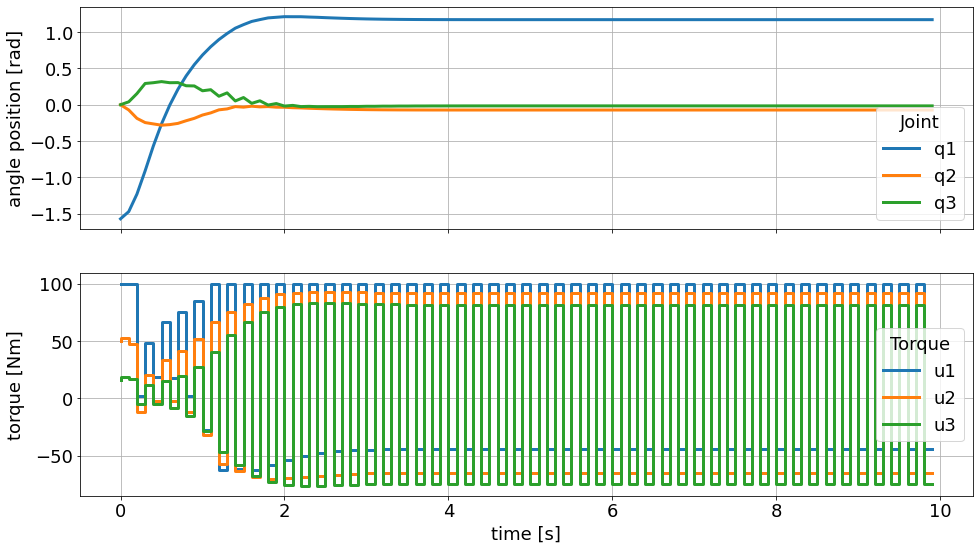

In [ ]:
sim_graphics.plot_results()
# Reset the limits on all axes in graphic to show the data.
sim_graphics.reset_axes()
# Show the figure:
lines = sim_graphics.result_lines['_x', 'q1']+sim_graphics.result_lines['_x', 'q2']+sim_graphics.result_lines['_x', 'q3']

ax[0].legend(lines,['q1','q2','q3'],title='Joint')

# also set legend for second subplot:
lines = sim_graphics.result_lines['_u', 'u1']+sim_graphics.result_lines['_u', 'u2']+sim_graphics.result_lines['_u', 'u3']
ax[1].legend(lines,['u1','u2','u3'],title='Torque')
fig

In [ ]:
print(mpc0.data['_x'])

[[-1.57079633e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.47143162e+00 -7.17050245e-02  3.99198050e-02  1.92209077e+00
  -1.30620158e+00  7.20291267e-01]
 [-1.23068090e+00 -1.87402198e-01  1.53165153e-01  2.72909954e+00
  -6.75030764e-01  1.30272333e+00]
 [-9.10471892e-01 -2.45606268e-01  2.92513815e-01  3.49532019e+00
  -1.24378666e-01  1.15757165e+00]
 [-5.68320529e-01 -2.63954982e-01  3.03180422e-01  3.32458134e+00
  -3.26495972e-01 -7.77762246e-01]
 [-2.63825593e-01 -2.81866691e-01  3.18278012e-01  2.75362795e+00
  -7.03909436e-02  1.15720885e+00]
 [-6.28846270e-03 -2.73766676e-01  3.03061255e-01  2.44550880e+00
   5.86482894e-02 -1.27412991e+00]
 [ 2.12107777e-01 -2.56926327e-01  3.04540650e-01  1.95540422e+00
   2.03892380e-01  1.36536612e+00]
 [ 3.95880492e-01 -2.20390734e-01  2.61298845e-01  1.77331577e+00
   3.94768103e-01 -2.11098171e+00]
 [ 5.51951191e-01 -1.87499948e-01  2.58675668e-01  1.37899023e+00
   2.28353155e-01  2.0715

In [ ]:
# Change the color for the three states:
for line_i in mpc_graphics.pred_lines['_x', 'q1']: line_i.set_color('#1f77b4') # blue
for line_i in mpc_graphics.pred_lines['_x', 'q2']: line_i.set_color('#ff7f0e') # orange
for line_i in mpc_graphics.pred_lines['_x', 'q3']: line_i.set_color('#2ca02c') # green
# Change the color for the two inputs:
for line_i in mpc_graphics.pred_lines['_u', 'u1']: line_i.set_color('#1f77b4')
for line_i in mpc_graphics.pred_lines['_u', 'u2']: line_i.set_color('#ff7f0e')
for line_i in mpc_graphics.pred_lines['_u', 'u3']: line_i.set_color('#2ca02c')

# Make all predictions transparent:
for line_i in mpc_graphics.pred_lines.full: line_i.set_alpha(0.2)

In [ ]:
# Get line objects (note sum of lists creates a concatenated list)
lines = sim_graphics.result_lines['_x', 'q1']+sim_graphics.result_lines['_x', 'q2']+sim_graphics.result_lines['_x', 'q3']

ax[0].legend(lines,['q1','q2','q3'],title='Joint')

# also set legend for second subplot:
lines = sim_graphics.result_lines['_u', 'u1']+sim_graphics.result_lines['_u', 'u2']+sim_graphics.result_lines['_u', 'u3']
ax[1].legend(lines,['u1','u2','u3'],title='Torque')

In [ ]:
# running the control loop
x0 = np.pi*np.array([-0.5, 0, 0, 0, 0, 0]).reshape(-1,1)
simulator.reset_history()
simulator.x0 = x0
mpc.reset_history()
mpc.x0 = x0

In [ ]:
%%capture
steps=100
for i in range(steps):
    u0 = mpc.make_step(x0)
    x0 = simulator.make_step(u0)

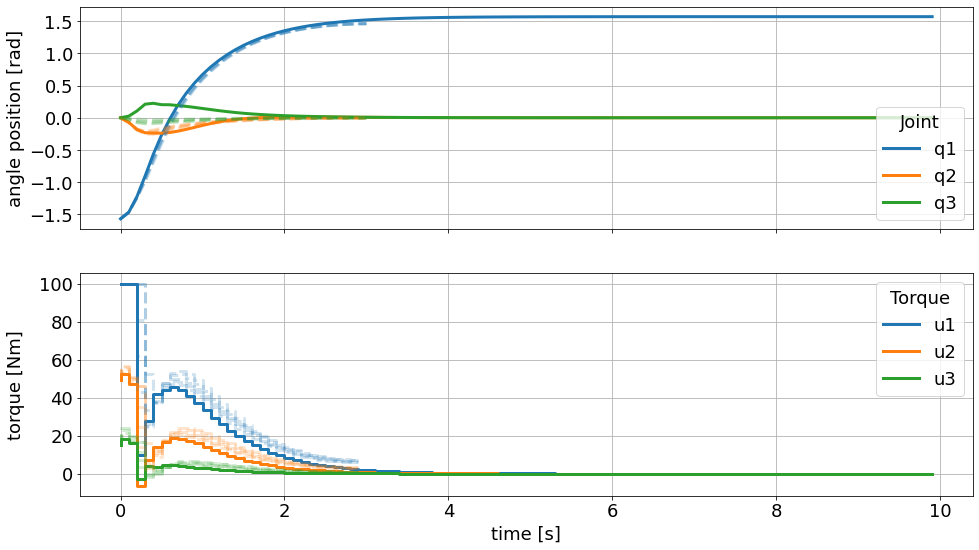

In [ ]:
# Plot predictions from t=0
mpc_graphics.plot_predictions(t_ind=0)
# Plot results until current time
sim_graphics.plot_results()
sim_graphics.reset_axes()
fig

In [ ]:
from matplotlib.animation import FuncAnimation, FFMpegWriter, ImageMagickWriter

def update(t_ind):
    sim_graphics.plot_results(t_ind)
    mpc_graphics.plot_predictions(t_ind)
    mpc_graphics.reset_axes()


In [ ]:
anim = FuncAnimation(fig, update, frames=steps, repeat=False)
gif_writer = ImageMagickWriter(fps=3)
anim.save('anim.gif', writer=gif_writer)

In [ ]:
from do_mpc.data import save_results, load_results
save_results([mpc,mpc0, simulator])


In [ ]:
results = load_results('./results/results.pkl')

In [ ]:
results['mpc']
x = results['mpc']['_x']
print(x)

[[-1.57079633e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.47226973e+00 -7.52847879e-02 -2.14683151e-02  1.89567546e+00
  -1.36710754e+00 -4.81475217e-01]
 [-1.24920949e+00 -1.93266179e-01 -5.41569699e-02  2.41248747e+00
  -7.22216523e-01 -2.66133545e-01]
 [-9.79452598e-01 -2.49453549e-01 -6.76867437e-02  2.83443705e+00
  -1.74492999e-01 -6.59636103e-02]
 [-6.76891704e-01 -2.50605261e-01 -6.62910848e-02  3.11870856e+00
   2.59977802e-01  8.77232269e-02]
 [-3.84287301e-01 -2.15900002e-01 -6.22581957e-02  2.77425731e+00
   2.81166374e-01  8.79881735e-02]
 [-1.27865935e-01 -1.82622543e-01 -5.75262891e-02  2.40601668e+00
   2.43234454e-01  8.00248028e-02]
 [ 9.46357535e-02 -1.54783579e-01 -5.21540887e-02  2.08996541e+00
   2.10295678e-01  7.28084957e-02]
 [ 2.87879021e-01 -1.31398331e-01 -4.65824697e-02  1.81587677e+00
   1.81596606e-01  6.51587613e-02]
 [ 4.55742224e-01 -1.11684740e-01 -4.11579462e-02  1.57789658e+00
   1.56555663e-01  5.7567